# Summarize Experimental Results

## Summarize Random Experiment Results

Calculating the Average Number of Queries

In [6]:
# Import necessary libraries.
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# Specify the directory where the log files are stored.
log_dirs = [
    "src/main/java/experiment/Random10States10SigmaE20240820060825",
    "src/main/java/experiment/Random10States20SigmaE20240820061313",
    "src/main/java/experiment/Random10States30SigmaE20240820063233",
    "src/main/java/experiment/Random10States40SigmaE20240820070359",
    "src/main/java/experiment/Random20States10SigmaE20240820075226",
    "src/main/java/experiment/Random20States20SigmaE20240820080147",
    "src/main/java/experiment/Random20States30SigmaE20240820131157",
    "src/main/java/experiment/Random20States40SigmaE20240821050352",
    "src/main/java/experiment/Random40States10SigmaE20240822003535",
    "src/main/java/experiment/Random40States20SigmaE20240822005032",
    "src/main/java/experiment/Random40States30SigmaE20240822032708",
    "src/main/java/experiment/Random40States40SigmaE20240822070030",
    "src/main/java/experiment/Random80States10SigmaE20240823035043",
    "src/main/java/experiment/Random80States20SigmaE20240826035332",
    "src/main/java/experiment/Random80States30SigmaE20240823084614",
    "src/main/java/experiment/Random80States40SigmaE20240824052823",
]

pattern = r"S:(\d)+ R:(\d+) SigmaE:(\d+) E:(\d+)"


# Function to calculate variance
def calculate_variance(data):
    mean = np.mean(data)
    variance = np.mean((data - mean) ** 2)
    return variance


for log_dir in log_dirs:
    last_part = os.path.basename(log_dir)

    # Initialize lists to store data.
    equivs = []
    outputs = []
    run_times = []
    SigmaE_sizes = []
    R_sizes = []
    E_sizes = []

    # Loop through all files in the directory.
    for root, dirs, files in os.walk(log_dir):
        for filename in files:
            # Ensure the file is in text format.
                with open(
                    os.path.join(root, filename), "r"
                ) as file:  # Open the file.
                    #print(filename)
                    for line in file:  # Read each line
                        if line.startswith("# equiv:"):  # Extract the equivalence queries results.
                            equivs.append(int(re.search(r"\d+", line).group()))
                        elif line.startswith("# output:"):  # Extract the output queries results.
                            outputs.append(int(re.search(r"\d+", line).group()))
                        elif line.startswith("# run time:"):  # Extract the run time results.
                            run_times.append(int(re.search(r"\d+", line).group()))

    for root, dirs, files in os.walk(log_dir):
        for filename in files:
            if filename.endswith(".log"):
                with open(os.path.join(root, filename), "r") as file:
                    log_data = file.read()
                results = re.findall(pattern, log_data)
                if results:
                    last_result = results[-1]
                    R_sizes.append(int(last_result[1]))
                    SigmaE_sizes.append(int(last_result[2]))
                    E_sizes.append(int(last_result[3]))

    # Calculate the average of the data.
    equiv_avg = sum(equivs) / len(equivs)
    output_avg = sum(outputs) / len(outputs)
    run_time_avg = sum(run_times) / len(run_times)
    Sigma_avg = sum(SigmaE_sizes) / len(SigmaE_sizes)
    R_avg = sum(R_sizes) / len(R_sizes)
    E_avg = sum(E_sizes) / len(E_sizes)

    equivs_variance = calculate_variance(np.array(equivs))
    outputs_variance = calculate_variance(np.array(outputs))
    run_times_variance = calculate_variance(np.array(run_times))
    SigmaE_sizes_variance = calculate_variance(np.array(SigmaE_sizes))
    R_sizes_variance = calculate_variance(np.array(R_sizes))
    E_sizes_variance = calculate_variance(np.array(E_sizes))


    # Write the results to a file.
    with open(os.path.join(log_dir, "Average" + last_part + ".txt"), "w") as f:
        f.write(f"Average equiv: {equiv_avg}\n")
        f.write(f"Average output: {output_avg}\n")
        f.write(f"Average run time: {run_time_avg} ms\n")
        f.write(f"Average SigmaE: {Sigma_avg}\n")
        f.write(f"Average R: {R_avg}\n")
        f.write(f"Average E: {E_avg}\n")
        f.write(f"Variance equiv: {equivs_variance}\n")
        f.write(f"Variance output: {outputs_variance}\n")
        f.write(f"Variance run time: {run_times_variance}\n")
        f.write(f"Variance SigmaE: {SigmaE_sizes_variance}\n")
        f.write(f"Variance R: {R_sizes_variance}\n")
        f.write(f"Variance E: {E_sizes_variance}\n")

t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


Create the table of the average experiment results

In [9]:
import pandas as pd

filenames_list_list = [
    ["src/main/java/experiment/Random10States10SigmaE20240820060825/AverageRandom10States10SigmaE20240820060825.txt",
    "src/main/java/experiment/Random10States20SigmaE20240820061313/AverageRandom10States20SigmaE20240820061313.txt",
    "src/main/java/experiment/Random10States30SigmaE20240820063233/AverageRandom10States30SigmaE20240820063233.txt",
    "src/main/java/experiment/Random10States40SigmaE20240820070359/AverageRandom10States40SigmaE20240820070359.txt",
    "src/main/java/experiment/Random20States10SigmaE20240820075226/AverageRandom20States10SigmaE20240820075226.txt",
    "src/main/java/experiment/Random20States20SigmaE20240820080147/AverageRandom20States20SigmaE20240820080147.txt",
    "src/main/java/experiment/Random20States30SigmaE20240820131157/AverageRandom20States30SigmaE20240820131157.txt",
    "src/main/java/experiment/Random20States40SigmaE20240821050352/AverageRandom20States40SigmaE20240821050352.txt",],
    ["src/main/java/experiment/Random40States10SigmaE20240822003535/AverageRandom40States10SigmaE20240822003535.txt",
    "src/main/java/experiment/Random40States20SigmaE20240822005032/AverageRandom40States20SigmaE20240822005032.txt",
    "src/main/java/experiment/Random40States30SigmaE20240822032708/AverageRandom40States30SigmaE20240822032708.txt",
    "src/main/java/experiment/Random40States40SigmaE20240822070030/AverageRandom40States40SigmaE20240822070030.txt",
    "src/main/java/experiment/Random80States10SigmaE20240823035043/AverageRandom80States10SigmaE20240823035043.txt",
    "src/main/java/experiment/Random80States20SigmaE20240826035332/AverageRandom80States20SigmaE20240826035332.txt",
    "src/main/java/experiment/Random80States30SigmaE20240823084614/AverageRandom80States30SigmaE20240823084614.txt",
    "src/main/java/experiment/Random80States40SigmaE20240824052823/AverageRandom80States40SigmaE20240824052823.txt"]]

# データを格納するリスト

for filenames_list in filenames_list_list:
  # 各ファイルを読み込み、データを抽出
    data = []
    for filename in filenames_list:
        with open(filename, "r") as file:
            lines = file.readlines()
            equiv = round(float(lines[0].split(":")[1].strip()),2)
            output = round(float(lines[1].split(":")[1].strip()),2)
            r = round(float(lines[4].split(":")[1].strip()),2)
            e = round(float(lines[5].split(":")[1].strip()),2)
            # ファイル名を整形
            base_name = filename.split("/")[-1]
            state = base_name.split("Random")[1].split("States")[0]
            sigma = base_name.split("States")[1].split("SigmaE")[0]
            state_sigma = (
            base_name.split("Average")[1].split("States")[0] + "_" +
            base_name.split("States")[1].split("SigmaE")[0]
        )

        data.append([state,sigma, equiv, output, r, e])

    # DataFrameに変換
    df = pd.DataFrame(
        data,
        columns=[
            "$n$",
            "$|\SigmaEf|$",
            "\# of eq.",
            "\# of oq.",
            "$|R|$",
            "$|E|$"
        ],
    )

    # LaTeXのtabular形式に変換
    latex_table = df.to_latex(index=False,escape = False)

    # 表示
    print(latex_table)


\begin{tabular}{llrrrr}
\toprule
$n$ & $|\SigmaEf|$ &  \# of eq. &  \# of oq. &  $|R|$ &  $|E|$ \\
\midrule
 10 &           10 &      10.00 &    1015.60 &  91.56 &    0.0 \\
 10 &           20 &      20.00 &    4075.60 & 193.78 &    0.0 \\
 10 &           30 &      29.99 &    9104.70 & 293.49 &    0.0 \\
 10 &           40 &      40.00 &   16161.60 & 394.04 &    0.0 \\
 20 &           10 &      10.10 &    2035.95 & 181.57 &    0.1 \\
 20 &           20 &      20.00 &    8030.80 & 381.54 &    0.0 \\
 20 &           30 &      30.00 &   18080.70 & 582.69 &    0.0 \\
 20 &           40 &      40.00 &   32110.80 & 782.77 &    0.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
$n$ & $|\SigmaEf|$ &  \# of eq. &  \# of oq. &   $|R|$ &  $|E|$ \\
\midrule
 40 &           10 &      10.00 &    4010.90 &  361.09 &    0.0 \\
 40 &           20 &      20.00 &   16036.20 &  761.81 &    0.0 \\
 40 &           30 &      30.00 &   36079.20 & 1162.64 &    0.0 \\
 40 &           40 &      4

 Plotting with Fixed the number of states

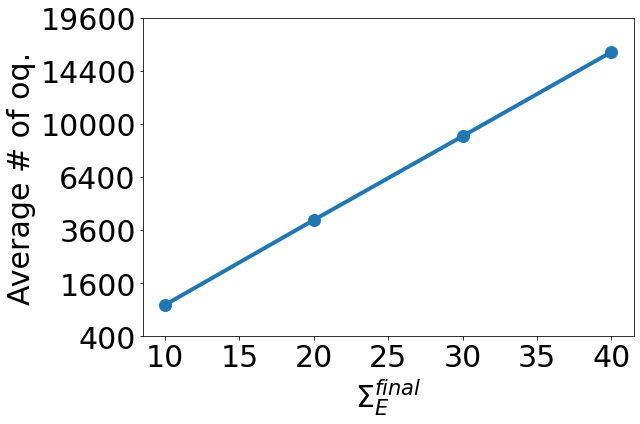

In [21]:
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42
# プロットのためのファイル名のリストを作成します。
filenames_list = [
    [
        "src/main/java/experiment/Random10States10SigmaE20240820060825/AverageRandom10States10SigmaE20240820060825.txt",
        "src/main/java/experiment/Random10States20SigmaE20240820061313/AverageRandom10States20SigmaE20240820061313.txt",
        "src/main/java/experiment/Random10States30SigmaE20240820063233/AverageRandom10States30SigmaE20240820063233.txt",
        "src/main/java/experiment/Random10States40SigmaE20240820070359/AverageRandom10States40SigmaE20240820070359.txt",
    ]
]

for filenames in filenames_list:
    # 新しいファイル名のリストを作成
    new_filenames = []
    sigma_numbers = []
    states_numbers = 0
    for filename in filenames:
        # パスからファイル名を取り出す
        base_filename = os.path.basename(filename)
        match = re.search(r"Random(\d+)States(\d+)SigmaE", base_filename)
        if match:
            new_filename = f"{match.group(1)}States{match.group(2)}SigmaE"
            new_filenames.append(new_filename)
            states_numbers = int(match.group(1))  # Statesの数字を取得
            sigma_numbers.append(int(match.group(2)))  # Sigma数字をリストに追加

    # データを保存するためのリストを初期化します。
    equivs = []
    outputs = []
    run_times = []

    # 各ファイルからデータを読み取ります。
    for filename in filenames:
        with open(filename, "r") as file:
            for line in file:
                if line.startswith("Average equiv:"):
                    equivs.append(float(line.split(":")[1].strip()))
                elif line.startswith("Average output:"):
                    outputs.append(float(line.split(":")[1].strip()))
                elif line.startswith("Average run time:"):
                    run_times.append(
                        float(line.split(":")[1].strip().split()[0])
                    )  # " ms"を削除します。

    # ファイル名を一つの文字列に結合
    joined_filenames = "-".join(new_filenames)


    # outputの値をプロットします。
    outputs_sqrt2 = np.sqrt(outputs)
    plt.figure(figsize=(9, 6))
    plt.plot(sigma_numbers, outputs_sqrt2, marker="o", linewidth = 4, markersize = 12)
    # plt.title(str(states_numbers) + "states", fontsize = 30)
    plt.xlabel(r"$\Sigma_E^{final}$", fontsize=30)
    plt.ylabel("Average # of oq.", fontsize = 30)
    # plt.yticks(np.linspace(min(outputs_sqrt2), max(outputs_sqrt2), num=10), fontsize=30)  # 等間隔の目盛りを設定
    # plt.yticks(outputs_sqrt2, [f"{output:.2f}" for output in outputs], fontsize=30)
    y_ticks = plt.yticks()[0]
    plt.yticks(y_ticks, [f"{int(y**2)}" for y in y_ticks], fontsize=30)  # 目盛りの値を2乗にして表示
    plt.xticks(fontsize = 30)
    plt.tight_layout()
    plt.savefig(joined_filenames + "output_plot.png")
    plt.savefig(joined_filenames + "output_plot.pdf")


Plotting Fixed SigmaEf

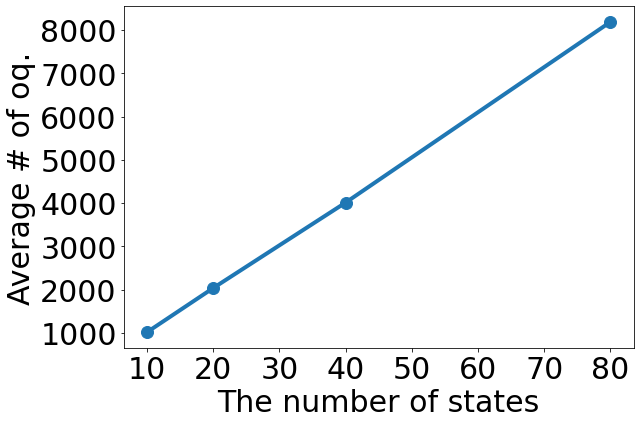

In [20]:
import matplotlib.pyplot as plt
import os
import re
import numpy as np
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

# ファイル名のリストを作成します。ここには実際のファイル名を入力してください。
filenames_list = [
       ["src/main/java/experiment/Random10States10SigmaE20240820060825/AverageRandom10States10SigmaE20240820060825.txt",
        "src/main/java/experiment/Random20States10SigmaE20240820075226/AverageRandom20States10SigmaE20240820075226.txt",
        "src/main/java/experiment/Random40States10SigmaE20240822003535/AverageRandom40States10SigmaE20240822003535.txt",
        "src/main/java/experiment/Random80States10SigmaE20240823035043/AverageRandom80States10SigmaE20240823035043.txt",]
]



for filenames in filenames_list:
    # 新しいファイル名のリストを作成
    new_filenames = []
    states_numbers = []
    sigma_numbers = 0
    for filename in filenames:
        # パスからファイル名を取り出す
        base_filename = os.path.basename(filename)
        match = re.search(r"Random(\d+)States(\d+)SigmaE", base_filename)
        if match:
            new_filename = f"{match.group(1)}States{match.group(2)}SigmaE"
            new_filenames.append(new_filename)
            sigma_numbers = int(match.group(2))
            states_numbers.append(int(match.group(1)))  # Statesの数字をリストに追加

    # データを保存するためのリストを初期化します。
    equivs = []
    outputs = []
    run_times = []

    # 各ファイルからデータを読み取ります。
    for filename in filenames:
        with open(filename, "r") as file:
            for line in file:
                if line.startswith("Average equiv:"):
                    equivs.append(float(line.split(":")[1].strip()))
                elif line.startswith("Average output:"):
                    outputs.append(float(line.split(":")[1].strip()))
                elif line.startswith("Average run time:"):
                    run_times.append(
                        float(line.split(":")[1].strip().split()[0])
                    )  # " ms"を削除します。
    # ファイル名を一つの文字列に結合
    joined_filenames = "-".join(new_filenames)

    # outputの値をプロットします。
    plt.figure(figsize=(9, 6))
    plt.plot(states_numbers, outputs, marker="o" , linewidth = 4, markersize = 12)
    #plt.title(str(sigma_numbers) +  r"$\Sigma_E^{final}$", fontsize = 30)
    plt.xlabel("The number of states", fontsize = 30)
    plt.ylabel("Average # of oq.", fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.xticks(fontsize = 30)
    #plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(joined_filenames + "output_plot.png")
    plt.savefig(joined_filenames + "output_plot.pdf")


Create the table for appendix

In [19]:
import pandas as pd

filenames_list = [
    [
        "src/main/java/experiment/Random10States10SigmaE20240820060825/AverageRandom10States10SigmaE20240820060825.txt",
        "src/main/java/experiment/Random10States20SigmaE20240820061313/AverageRandom10States20SigmaE20240820061313.txt",
    ],
    [
        "src/main/java/experiment/Random10States30SigmaE20240820063233/AverageRandom10States30SigmaE20240820063233.txt",
        "src/main/java/experiment/Random10States40SigmaE20240820070359/AverageRandom10States40SigmaE20240820070359.txt",
    ],
    [
        "src/main/java/experiment/Random20States10SigmaE20240820075226/AverageRandom20States10SigmaE20240820075226.txt",
        "src/main/java/experiment/Random20States20SigmaE20240820080147/AverageRandom20States20SigmaE20240820080147.txt",
    ],
    [
        "src/main/java/experiment/Random20States30SigmaE20240820131157/AverageRandom20States30SigmaE20240820131157.txt",
        "src/main/java/experiment/Random20States40SigmaE20240821050352/AverageRandom20States40SigmaE20240821050352.txt",
    ],
    [
        "src/main/java/experiment/Random40States10SigmaE20240822003535/AverageRandom40States10SigmaE20240822003535.txt",
        "src/main/java/experiment/Random40States20SigmaE20240822005032/AverageRandom40States20SigmaE20240822005032.txt",
    ],
    [
        "src/main/java/experiment/Random40States30SigmaE20240822032708/AverageRandom40States30SigmaE20240822032708.txt",
        "src/main/java/experiment/Random40States40SigmaE20240822070030/AverageRandom40States40SigmaE20240822070030.txt",
    ],
    [
        "src/main/java/experiment/Random80States10SigmaE20240823035043/AverageRandom80States10SigmaE20240823035043.txt",
        "src/main/java/experiment/Random80States20SigmaE20240826035332/AverageRandom80States20SigmaE20240826035332.txt",
    ],
    [
        "src/main/java/experiment/Random80States30SigmaE20240823084614/AverageRandom80States30SigmaE20240823084614.txt",
        "src/main/java/experiment/Random80States40SigmaE20240824052823/AverageRandom80States40SigmaE20240824052823.txt",
    ],
]

# データを格納するリスト
data = []

# 各ファイルを読み込み、データを抽出
for filenames in filenames_list:
    for filename in filenames:
        with open(filename, "r") as file:
            lines = file.readlines()
            equiv = round(float(lines[0].split(":")[1].strip()), 2)
            output = round(float(lines[1].split(":")[1].strip()), 2)
            r = round(float(lines[4].split(":")[1].strip()), 2)
            e = round(float(lines[5].split(":")[1].strip()), 2)
            var_equiv = round(float(lines[6].split(":")[1].strip()), 2)
            var_output = round(float(lines[7].split(":")[1].strip()), 2)
            var_r = round(float(lines[10].split(":")[1].strip()), 2)
            var_e = round(float(lines[11].split(":")[1].strip()), 2)
            # ファイル名を整形
            base_name = filename.split("/")[-1]
            state = base_name.split("Random")[1].split("States")[0]
            sigma = base_name.split("States")[1].split("SigmaE")[0]
            state_sigma = (
                base_name.split("Average")[1].split("States")[0]
                + "_"
                + base_name.split("States")[1].split("SigmaE")[0]
            )
            data.append(
                [state, sigma, equiv, output, r, e, var_equiv, var_output, var_r, var_e]
            )

# DataFrameに変換
df = pd.DataFrame(
    data,
    columns=[
        "States",
        "SigmaE",
        "Equiv",
        "Output",
        "R",
        "E",
        "Var(Equiv)",
        "Var(Output)",
        "Var(R)",
        "Var(E)",
    ],
)

# LaTeXのtabular形式に変換
latex_table = df.to_latex(index=False)

# 表示
print(latex_table)

\begin{tabular}{llrrrrrrrr}
\toprule
States & SigmaE &  Equiv &    Output &       R &   E &  Var(Equiv) &  Var(Output) &  Var(R) &  Var(E) \\
\midrule
    10 &     10 &  10.00 &   1015.60 &   91.56 & 0.0 &        0.00 &        78.64 &    0.79 &    0.00 \\
    10 &     20 &  20.00 &   4075.60 &  193.78 & 0.0 &        0.00 &      4036.64 &   10.09 &    0.00 \\
    10 &     30 &  29.99 &   9104.70 &  293.49 & 0.0 &        0.01 &      7406.91 &    8.23 &    0.00 \\
    10 &     40 &  40.00 &  16161.60 &  394.04 & 0.0 &        0.00 &      9661.44 &    6.04 &    0.00 \\
    20 &     10 &  10.10 &   2035.95 &  181.57 & 0.1 &        0.09 &      4146.25 &    0.79 &    0.09 \\
    20 &     20 &  20.00 &   8030.80 &  381.54 & 0.0 &        0.00 &       299.36 &    0.75 &    0.00 \\
    20 &     30 &  30.00 &  18080.70 &  582.69 & 0.0 &        0.00 &      4602.51 &    5.11 &    0.00 \\
    20 &     40 &  40.00 &  32110.80 &  782.77 & 0.0 &        0.00 &      8955.36 &    5.60 &    0.00 \\
    40 & 

# Summarize Practical Experiment Results

In [31]:
import os
import re

# ログファイルが格納されているディレクトリを指定します。
log_dir = "practical_experiment_log/practical_experiment_logs_20240917075343/GearShift_20240917075343"
last_part = os.path.basename(log_dir)

# 結果を保存するためのリストを初期化します。
equivs = []
outputs = []
run_times = []
SigmaE_sizes = []
R_sizes = []
E_sizes = []

# 正規表現パターンを定義します
pattern = r"S:(\d)+ R:(\d+) SigmaE:(\d+) E:(\d+)"

# ディレクトリ内のすべてのファイルをループします。
for root, dirs, files in os.walk(log_dir):
    for filename in files:
        if filename.endswith(".log"):  # ファイルがテキスト形式であることを確認します。
            with open(
                os.path.join(root, filename), "r"
            ) as file:  # ファイルを開きます。
                for line in file:  # 各行を読み取ります。
                    if line.startswith("# equiv:"):  # equivの結果を抽出します。
                        equivs.append(int(re.search(r"\d+", line).group()))
                    elif line.startswith("# output:"):  # outputの結果を抽出します。
                        outputs.append(int(re.search(r"\d+", line).group()))
                    elif line.startswith("# run time:"):  # run timeの結果を抽出します。
                        run_times.append(int(re.search(r"\d+", line).group()))

for root, dirs, files in os.walk(log_dir):
    for filename in files:
        if filename.endswith(".log"):
            with open(os.path.join(root, filename), "r") as file:
                log_data = file.read()
            results = re.findall(pattern, log_data)
            if results:
                last_result = results[-1]
                R_sizes.append(int(last_result[1]))
                SigmaE_sizes.append(int(last_result[2]))
                E_sizes.append(int(last_result[3]))


# 平均値を計算します。
equiv_avg = sum(equivs) / len(equivs)
output_avg = sum(outputs) / len(outputs)
run_time_avg = sum(run_times) / len(run_times)
R_avg = sum(R_sizes) / len(R_sizes) if R_sizes else 0
SigmaE_avg = sum(SigmaE_sizes) / len(SigmaE_sizes) if SigmaE_sizes else 0
E_avg = sum(E_sizes) / len(E_sizes) if E_sizes else 0


# 結果をファイルに書き込みます。
with open(os.path.join(log_dir, "Average" + last_part + ".txt"), "w") as f:
    f.write(f"Average equiv: {equiv_avg}\n")
    f.write(f"Average output: {output_avg}\n")
    f.write(f"Average run time: {run_time_avg}\n")
    f.write(f"Average R: {R_avg}\n")
    f.write(f"Average SigmaE: {SigmaE_avg}\n")
    f.write(f"Average E: {E_avg}\n")

In [28]:
import os
import re

# ログファイルが格納されているディレクトリを指定します。
log_dir = "practical_experiment_log/practical_experiment_logs_20240917075343/MarsHelicopter_20240917144739"
last_part = os.path.basename(log_dir)

# 結果を保存するためのリストを初期化します。
equivs = []
outputs = []
run_times = []
SigmaE_sizes = []
R_sizes = []
E_sizes = []

# 正規表現パターンを定義します
pattern = r"S:(\d)+ R:(\d+) SigmaE:(\d+) E:(\d+)"

# ディレクトリ内のすべてのファイルをループします。
for root, dirs, files in os.walk(log_dir):
    for filename in files:
        if filename.endswith(".log"):  # ファイルがテキスト形式であることを確認します。
            with open(
                os.path.join(root, filename), "r"
            ) as file:  # ファイルを開きます。
                for line in file:  # 各行を読み取ります。
                    if line.startswith("# equiv:"):  # equivの結果を抽出します。
                        equivs.append(int(re.search(r"\d+", line).group()))
                    elif line.startswith("# output:"):  # outputの結果を抽出します。
                        outputs.append(int(re.search(r"\d+", line).group()))
                    elif line.startswith("# run time:"):  # run timeの結果を抽出します。
                        run_times.append(int(re.search(r"\d+", line).group()))

for root, dirs, files in os.walk(log_dir):
    for filename in files:
        if filename.endswith(".log"):
            with open(os.path.join(root, filename), "r") as file:
                log_data = file.read()
            results = re.findall(pattern, log_data)
            if results:
                last_result = results[-1]
                R_sizes.append(int(last_result[1]))
                SigmaE_sizes.append(int(last_result[2]))
                E_sizes.append(int(last_result[3]))


# 平均値を計算します。
equiv_avg = sum(equivs) / len(equivs)
output_avg = sum(outputs) / len(outputs)
run_time_avg = sum(run_times) / len(run_times)
R_avg = sum(R_sizes) / len(R_sizes) if R_sizes else 0
SigmaE_avg = sum(SigmaE_sizes) / len(SigmaE_sizes) if SigmaE_sizes else 0
E_avg = sum(E_sizes) / len(E_sizes) if E_sizes else 0

# 結果をファイルに書き込みます。
with open(os.path.join(log_dir, "Average" + last_part + ".txt"), "w") as f:
    f.write(f"Average equiv: {equiv_avg}\n")
    f.write(f"Average output: {output_avg}\n")
    f.write(f"Average run time: {run_time_avg} \n")
    f.write(f"Average R: {R_avg}\n")
    f.write(f"Average SigmaE: {SigmaE_avg}\n")
    f.write(f"Average E: {E_avg}\n")

Make the table of result

In [ ]:
!bash maximum_length_cex.sh

In [43]:
import pandas as pd

# ファイルパスを指定します
file1 = "practical_experiment_log/practical_experiment_logs_20240917075343/GearShift_20240917075343/AverageGearShift_20240917075343.txt"
file2 = "practical_experiment_log/practical_experiment_logs_20240917075343/MarsHelicopter_20240917144739/AverageMarsHelicopter_20240917144739.txt"

data = []
with open(file2, "r") as file:
    lines = file.readlines()
    equiv = round(float(lines[0].split(":")[1].strip()), 2)
    output = round(float(lines[1].split(":")[1].strip()), 2)
    runtime = round(float(lines[2].split(":")[1].strip()), 2)
    sigmae = round(float(lines[3].split(":")[1].strip()), 2)
    r = round(float(lines[4].split(":")[1].strip()), 2)
    e = round(float(lines[5].split(":")[1].strip()), 2)
    m = round(float(lines[6].split(":")[1].strip()), 2)
    data.append(["\MH",4, 5, 12, 1,3, equiv, output, runtime, sigmae, r, e,m])

with open(file1, "r") as file:
    lines = file.readlines()
    equiv = round(float(lines[0].split(":")[1].strip()), 2)
    output = round(float(lines[1].split(":")[1].strip()), 2)
    runtime = round(float(lines[2].split(":")[1].strip()), 2)
    sigmae = round(float(lines[3].split(":")[1].strip()), 2)
    r = round(float(lines[4].split(":")[1].strip()), 2)
    e = round(float(lines[5].split(":")[1].strip()), 2)
    m = int(float(lines[6].split(":")[1].strip()))
    data.append(["\ATGS",4, 16, 32,0, 2,  equiv, output, runtime, sigmae, r, e, m])

df = pd.DataFrame(
    data,
    columns=[
        "{}",
        "$|\Gamma|$",
    "$n$",
        "$|\delta|$",
        "\# Bool.",
        "\# Num.",
        "\# of eq.",
        "\# of oq.",
        "runtime [s.]",
        "$|\SigmaEf|$",
        "$|R|$",
        "$|E|$",
        "$m$"
    ]
)

latex_table = df.to_latex(index=False, escape = False)

print(latex_table)


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
   {} &  $|\Gamma|$ &  $n$ &  $|\delta|$ &  \# Bool. &  \# Num. &  \# of eq. &  \# of oq. &  runtime [s.] &  $|\SigmaEf|$ &  $|R|$ &  $|E|$ &  $m$ \\
\midrule
  \MH &           4 &    5 &          12 &         1 &        3 &       36.0 &     6516.0 &       10949.3 &         176.0 &   36.0 &    0.0 &  4.0 \\
\ATGS &           4 &   16 &          32 &         0 &        2 &       66.0 &    86446.8 &     2481248.6 &        1152.2 &   68.0 &    6.0 & 12.0 \\
\bottomrule
\end{tabular}

